## Data Cleaning

### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

### Read and explore Data.csv

In [2]:
df = pd.read_csv("../data/Data.csv")
df.head()

,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
0,14/08/2024,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,2.88,"Measuring, Medical, Photo Equipment; Clocks",Public,"2,024.00",0.77,-12.55
1,08/08/2024,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,13.17,Prepackaged Software,Public,"2,024.00",0.32,-12.91
2,06/08/2024,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,3.91,Business Services,Public,"2,024.00",3.97,-2.19
3,03/08/2024,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,"2,024.00",4.16,10.72
4,01/08/2024,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,5.86,Electronic and Electrical Equipment,Public,"2,024.00",2.41,-4.33


In [3]:
df.dtypes

Date                         object
Target_Name                  object
Target_Industry_Macro        object
Target_Industry_Mid          object
Target_Nation                object
Buyer_Name                   object
Buyer_Industry_Macro         object
Buyer_Industry_Mid           object
Buyer_Nation                 object
Target_Revenues              object
Target_EBITDA                object
Target_EV                    object
Target_Industry_Detailed     object
Target_Status                object
Year                         object
EV_Rev                      float64
EV_EBITDA                   float64
dtype: object

### Change some objects into floats and ints

In [4]:
df['Target_Revenues']=df['Target_Revenues'].str.replace(',','')
df['Target_Revenues'] = df.Target_Revenues.astype(float)

df['Target_EBITDA']=df['Target_EBITDA'].str.replace(',','')
df['Target_EBITDA']=df.Target_EBITDA.astype(float)

df['Target_EV']=df['Target_EV'].str.replace(',','')
df['Target_EV']=df.Target_EV.astype(float)

df['Year']=df['Year'].str.replace(',','')
df['Year']=df.Year.astype(float)
df['Year']=df.Year.astype(int)

df.head()

,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
0,14/08/2024,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,2.88,"Measuring, Medical, Photo Equipment; Clocks",Public,2024,0.77,-12.55
1,08/08/2024,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,13.17,Prepackaged Software,Public,2024,0.32,-12.91
2,06/08/2024,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,3.91,Business Services,Public,2024,3.97,-2.19
3,03/08/2024,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,2024,4.16,10.72
4,01/08/2024,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,5.86,Electronic and Electrical Equipment,Public,2024,2.41,-4.33


### Change 'Date' from 'object' to 'datetime'

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [6]:
#Double check dtypes
df.dtypes

Date                        datetime64[ns]
Target_Name                         object
Target_Industry_Macro               object
Target_Industry_Mid                 object
Target_Nation                       object
Buyer_Name                          object
Buyer_Industry_Macro                object
Buyer_Industry_Mid                  object
Buyer_Nation                        object
Target_Revenues                    float64
Target_EBITDA                      float64
Target_EV                          float64
Target_Industry_Detailed            object
Target_Status                       object
Year                                 int64
EV_Rev                             float64
EV_EBITDA                          float64
dtype: object

### Remove 'Government and Agencies' from Target Industry

In [7]:
df = df[df['Target_Industry_Macro'] != 'Government and Agencies']
df.shape

(14768, 17)

### Remove Nulls

In [8]:
df = df.dropna()

nan_count=df.isnull().sum()
print(nan_count)
print('')
print('New shape:', df.shape)

Date                        0
Target_Name                 0
Target_Industry_Macro       0
Target_Industry_Mid         0
Target_Nation               0
Buyer_Name                  0
Buyer_Industry_Macro        0
Buyer_Industry_Mid          0
Buyer_Nation                0
Target_Revenues             0
Target_EBITDA               0
Target_EV                   0
Target_Industry_Detailed    0
Target_Status               0
Year                        0
EV_Rev                      0
EV_EBITDA                   0
dtype: int64

New shape: (14766, 17)


### Remove Outliers

In [9]:
#Keep EV_Rev < 100
df = df[df['EV_Rev'] < 100]
#Keep EV_EBITDA >-100 and <500
df = df[df['EV_EBITDA'] > -100]  #was -100
df = df[df['EV_EBITDA'] < 100]  #was 500

df.shape

(13786, 17)

### One Hot Encoding

In [10]:
country_to_region = {
    'United States': 'North America',
    'Canada': 'North America',
    'Greenland': 'North America',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Belgium': 'Western Europe',
    'Luxembourg': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Austria': 'Western Europe',
    'Liechtenstein': 'Western Europe',
    'Monaco': 'Western Europe',
    'United Kingdom': 'UK',
    'Jersey': 'UK',
    'Guernsey': 'UK',
    'Isle of Man': 'UK',
    'Ireland': 'UK',
    'Sweden': 'Nordics',
    'Norway': 'Nordics',
    'Denmark': 'Nordics',
    'Finland': 'Nordics',
    'Iceland': 'Nordics',
    'Poland': 'Eastern Europe',
    'Bosnia and Herzegovina': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Bulgaria': 'Eastern Europe',
    'Russia': 'Eastern Europe',
    'Estonia': 'Eastern Europe',
    'Latvia': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Moldova': 'Eastern Europe',
    'Serbia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'North Macedonia': 'Eastern Europe',
    'Montenegro': 'Eastern Europe',
    'Slovakia': 'Eastern Europe',
    'Czech Republic': 'Eastern Europe',
    'Portugal': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Greece': 'Southern Europe',
    'Croatia': 'Southern Europe',
    'Cyprus': 'Southern Europe',
    'Malta': 'Southern Europe',
    'Gibraltar': 'Southern Europe',
    'Turkey': 'Southern Europe'
}

# Apply the updated mapping to create a new column
df['Target_Region'] = df['Target_Nation'].map(country_to_region)

# One-hot encode the 'Target_Region' column
df['Target_Region_A'] = df['Target_Region']
df['Target_Macro_A'] = df['Target_Industry_Macro']
df['Target_Status_A'] = df['Target_Status']
df = pd.get_dummies(df, columns=['Target_Region'])
df = pd.get_dummies(df, columns=['Target_Industry_Macro'])
df = pd.get_dummies(df, columns=['Target_Status'])

In [11]:
df = df.drop(columns=['Target_Status_Private'])

### Log Transformations

In [12]:
df['log_Target_EV'] = df['Target_EV'].apply(lambda x: np.log(x))
df['log_Target_Revenues'] = df['Target_Revenues'].apply(lambda x: np.log(x))

#neglog transformation to allow negative EBITDAs
df['log_Target_EBITDA'] = df['Target_EBITDA'].apply(lambda x: -np.log(abs(x)) if x < 0 else np.log(x))
#remove one row with value of -inf
df = df[df['log_Target_EBITDA'] != -np.inf]

#check new shape
df.shape

(13785, 40)

In [13]:
# Check for nulls
# nan_count=df.isnull().sum()
# print(nan_count)

#### Clean dataframe

In [14]:
df

,Date,Target_Name,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,...,Target_Industry_Macro_Industrials,Target_Industry_Macro_Materials,Target_Industry_Macro_Media and Entertainment,Target_Industry_Macro_Real Estate,Target_Industry_Macro_Retail,Target_Industry_Macro_Telecommunications,Target_Status_Public,log_Target_EV,log_Target_Revenues,log_Target_EBITDA
0,2024-08-14,Sarsys-Asft AB,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,...,1,0,0,0,0,0,1,1.057790,1.324419,1.469676
1,2024-08-08,GSE Systems Inc,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,...,0,0,0,0,0,0,1,2.577942,3.733136,-0.019803
2,2024-08-06,INEO Tech Corp,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,...,0,0,0,0,0,0,1,1.363537,-0.020203,-0.576613
3,2024-08-03,Big Cheese Studio SA,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,...,0,0,0,0,0,0,1,2.423917,0.996949,0.048790
4,2024-08-01,Braille Energy Systems Inc,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,...,0,0,0,0,0,0,1,1.768150,0.887891,-0.300105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14770,2014-01-14,Delphi Automotive PLC,Automobiles & Components,United Kingdom,Delphi Automotive PLC,Industrials,Automobiles & Components,United Kingdom,11984.02,1724.48,...,1,0,0,0,0,0,1,10.537536,9.391329,7.452681
14771,2014-01-13,Time Warner Cable Inc,Cable,United States,Charter Communications Inc,Telecommunications,Telecommunications Services,United States,16093.18,5805.77,...,0,0,1,0,0,0,1,10.731462,9.686151,8.666608
14772,2014-01-13,Beam Inc,Food and Beverage,United States,Suntory Holdings Ltd,Consumer Staples,Food and Beverage,Japan,1849.33,575.99,...,0,0,0,0,0,0,1,9.348307,7.522579,6.356090
14773,2014-01-03,Sirius XM Holdings Inc,Broadcasting,United States,Liberty Media Corp,Media and Entertainment,Broadcasting,United States,2763.99,946.36,...,0,0,1,0,0,0,1,9.873152,7.924431,6.852623


### Graphs

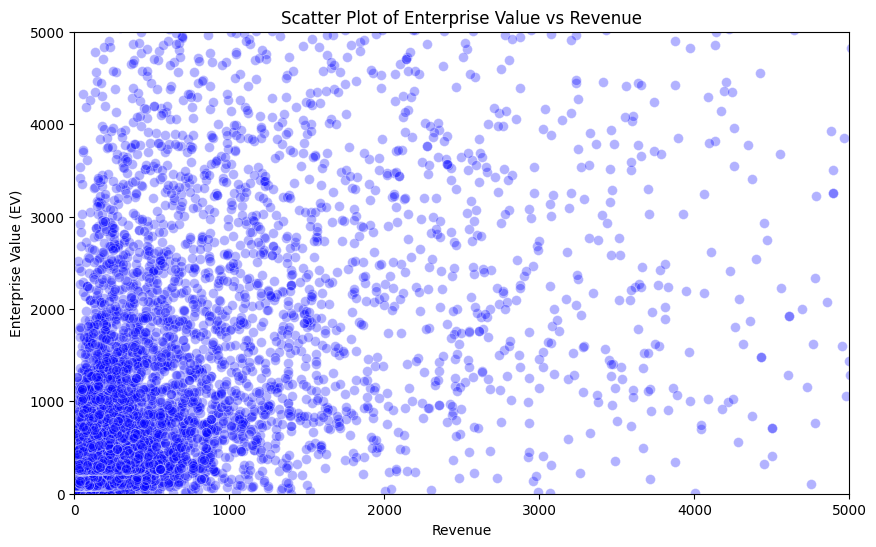

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Target_Revenues'], y=df['Target_EV'], alpha=0.3, color='blue', s=50)

plt.xlabel('Revenue')
plt.ylabel('Enterprise Value (EV)')
plt.title('Scatter Plot of Enterprise Value vs Revenue')

plt.xlim(0, 5000)  # Example x-axis limits
plt.ylim(0, 5000)  # Example y-axis limits

plt.show()

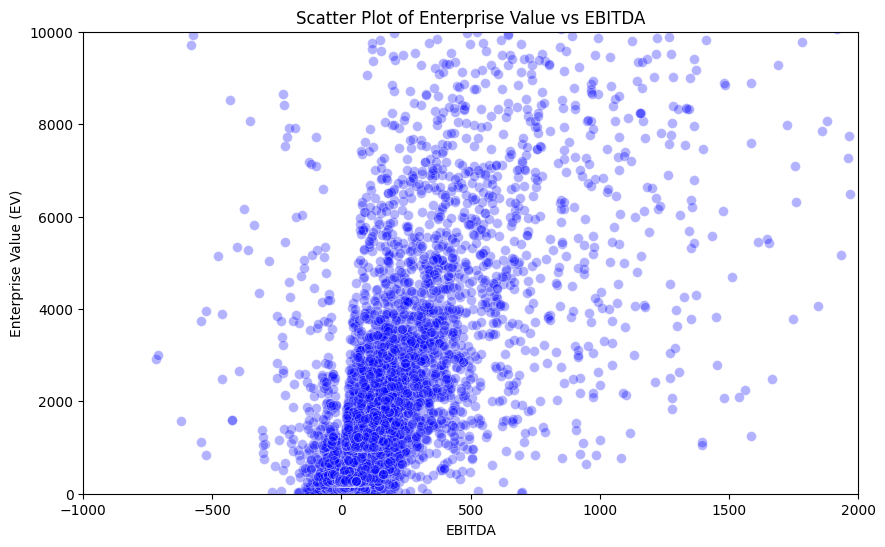

In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Target_EBITDA'], y=df['Target_EV'], alpha=0.3, color='blue', s=50)

plt.xlabel('EBITDA')
plt.ylabel('Enterprise Value (EV)')
plt.title('Scatter Plot of Enterprise Value vs EBITDA')

plt.xlim(-1000, 2000)  # Example x-axis limits
plt.ylim(0, 10000)  # Example y-axis limits

plt.show()

### Linear Regression

In [17]:
# Step 1: Prepare the data
copy_df = df

# Step 2: Standardize the data
scaler = StandardScaler()
copy_df[['log_Target_EV', 'log_Target_EBITDA', 'log_Target_Revenues']] = scaler.fit_transform(copy_df[['log_Target_EV', 'log_Target_EBITDA', 'log_Target_Revenues']])

#Step 3: Linear regression model
logcatmodel = smf.ols(formula = 'log_Target_EV ~ log_Target_EBITDA + log_Target_Revenues + C(Target_Macro_A) + C(Target_Region_A) + Target_Status_Public', data=copy_df)
logcatmodel = logcatmodel.fit()

#Print model summary
logcatmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_Target_EV   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     3272.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:23:28   Log-Likelihood:                -7788.9
No. Observations:               13785   AIC:                         1.562e+04
Df Residuals:                   13765   BIC:                         1.577e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.6146      0.022    -28.558      0.000      -0.657      -0.572
C(Target_Macro_A)[T.Consumer Staples]            0.0757      0.021      3.622      0.000       0.035       0.117
C(Target_Macro_A)[T.Energy and Power]            0.2398      0.018     13.133      0.000       0.204       0.276
C(Target_Macro_A)[T.Financials]                  0.3499      0.017     20.842      0.000       0.317       0.383
C(Target_Macro_A)[T.Healthcare]                  0.3785      0.019     20.125      0.000       0.342       0.415
C(Target_Macro_A)[T.High Technology]             0.1659      0.017     10.033      0.000       0.133       0.198
C(Target_Macro_A)[T.Industrials]                 0.0601      0.017      3.495      0.000       0.026       0.094
C(Target_Macro_A)[T.Materials]                   0.0672      0.019      3.613      0.000       0.031       0.104
C(Target_Macro_A)[T.Media and Entertainment]     0.1422      0.021      6.918      0.000       0.102       0.182
C(Target_Macro_A)[T.Real Estate]                 0.6661      0.021     31.556      0.000       0.625       0.708
C(Target_Macro_A)[T.Retail]                     -0.0317      0.022     -1.430      0.153      -0.075       0.012
C(Target_Macro_A)[T.Telecommunications]          0.2185      0.027      8.244      0.000       0.167       0.270
C(Target_Region_A)[T.Nordics]                    0.2298      0.018     12.740      0.000       0.194       0.265
C(Target_Region_A)[T.North America]              0.3622      0.014     25.972      0.000       0.335       0.390
C(Target_Region_A)[T.Southern Europe]            0.2494      0.017     14.984      0.000       0.217       0.282
C(Target_Region_A)[T.UK]                         0.2694      0.018     15.015      0.000       0.234       0.305
C(Target_Region_A)[T.Western Europe]             0.2458      0.017     14.796      0.000       0.213       0.278
log_Target_EBITDA                                0.1429      0.006     25.567      0.000       0.132       0.154
log_Target_Revenues                              0.7574      0.006    133.299      0.000       0.746       0.769
Target_Status_Public                             0.1540      0.013     12.244      0.000       0.129       0.179
==============================================================================
Omnibus:                      585.545   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.595
Skew:                          -0.244   Prob(JB):                    4.93e-307
Kurtosis:                       4.489   Cond. No.                         20.5
==============================================================================

Notes:
[1

In [18]:
# Re-transform logs to find R^2:
corrected_R2 = np.corrcoef(np.exp(logcatmodel.fittedvalues),np.exp(df.log_Target_EV))**2
print('Corrected R^2:', corrected_R2[1][0])

Corrected R^2: 0.7944293621104074


### KNN Model (optimal n_neighbors=5)

In [19]:
# Step 1: Prepare the Data
# Assuming df is already in your environment
X = df[['log_Target_Revenues', 'log_Target_EBITDA', 'Target_Status_Public', 'Target_Region_Eastern Europe', 'Target_Region_Nordics', 'Target_Region_North America', 'Target_Region_Southern Europe', 'Target_Region_UK', 'Target_Region_Western Europe', 'Target_Industry_Macro_Consumer Products and Services', 'Target_Industry_Macro_Consumer Staples','Target_Industry_Macro_Energy and Power','Target_Industry_Macro_Financials','Target_Industry_Macro_Healthcare','Target_Industry_Macro_High Technology','Target_Industry_Macro_Industrials','Target_Industry_Macro_Materials','Target_Industry_Macro_Media and Entertainment','Target_Industry_Macro_Real Estate','Target_Industry_Macro_Retail','Target_Industry_Macro_Telecommunications']]
y = df['log_Target_EV']

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the Data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the KNN Model
knn = KNeighborsRegressor(n_neighbors=5)   # Grid-search found n=5 is optimal
knn.fit(X_train_scaled, y_train)

# Step 5: Predict on Training and Testing Sets
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Step 6: Evaluate the Model on Training Data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Step 7: Evaluate the Model on Testing Data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print('Performance on Training Data:')
print(f'Root Mean Squared Error (Train): {train_rmse}')
print(f'R^2 Score (Train): {train_r2}')
corrected_r2_train = np.corrcoef(np.exp(y_train_pred),np.exp(y_train))**2
print(f'Corrected R^2 Score (Train): {corrected_r2_train[1][0]}')
print('\nPerformance on Testing Data:')
print(f'Root Mean Squared Error (Test): {test_rmse}')
print(f'R^2 Score (Test): {test_r2}')
corrected_r2_test = np.corrcoef(np.exp(y_test_pred),np.exp(y_test))**2
print(f'Corrected R^2 Score (Test): {corrected_r2_test[1][0]}')

Performance on Training Data:
Root Mean Squared Error (Train): 0.31491275062169727
R^2 Score (Train): 0.9008732178140456
Corrected R^2 Score (Train): 0.9049124457698781

Performance on Testing Data:
Root Mean Squared Error (Test): 0.38931719562324496
R^2 Score (Test): 0.8481670313435202
Corrected R^2 Score (Test): 0.8434998316823055


### Ridge Regression

In [20]:
# Step 1: Prepare the Data
X = df[['log_Target_Revenues', 'log_Target_EBITDA', 'Target_Status_Public', 'Target_Region_Eastern Europe', 'Target_Region_Nordics', 'Target_Region_North America', 'Target_Region_Southern Europe', 'Target_Region_UK', 'Target_Region_Western Europe', 'Target_Industry_Macro_Consumer Products and Services', 'Target_Industry_Macro_Consumer Staples','Target_Industry_Macro_Energy and Power','Target_Industry_Macro_Financials','Target_Industry_Macro_Healthcare','Target_Industry_Macro_High Technology','Target_Industry_Macro_Industrials','Target_Industry_Macro_Materials','Target_Industry_Macro_Media and Entertainment','Target_Industry_Macro_Real Estate','Target_Industry_Macro_Retail','Target_Industry_Macro_Telecommunications']]
y = df['log_Target_EV']

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the Data (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the Ridge Regression Model
ridge_reg = Ridge(alpha=10)  # You can adjust alpha to control regularization strength
ridge_reg.fit(X_train_scaled, y_train)

# Step 5: Predict on Training and Testing Sets
y_train_pred = ridge_reg.predict(X_train_scaled)
y_test_pred = ridge_reg.predict(X_test_scaled)

# Step 6: Evaluate the Model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print('Performance on Training Data:')
print(f'Root Mean Squared Error (Train): {train_rmse}')
print(f'R^2 Score (Train): {train_r2}')
corrected_r2_train = np.corrcoef(np.exp(y_train_pred),np.exp(y_train))**2
print(f'Corrected R^2 Score (Train): {corrected_r2_train[1][0]}')
print('\nPerformance on Testing Data:')
print(f'Root Mean Squared Error (Test): {test_rmse}')
print(f'R^2 Score (Test): {test_r2}')
corrected_r2_test = np.corrcoef(np.exp(y_test_pred),np.exp(y_test))**2
print(f'Corrected R^2 Score (Test): {corrected_r2_test[1][0]}')

Performance on Training Data:
Root Mean Squared Error (Train): 0.42149183230408266
R^2 Score (Train): 0.82321649043473
Corrected R^2 Score (Train): 0.8013188280577941

Performance on Testing Data:
Root Mean Squared Error (Test): 0.43588084532740246
R^2 Score (Test): 0.8077855962192084
Corrected R^2 Score (Test): 0.7794832996739302
